In [39]:
#!/usr/bin/env python
""" 3d map buindings tests follow this tutorial:
 
https://towardsdatascience.com/geospatial-adventures-step-2-pandas-vs-geopandas-16e842d0e3a7
"""

import numpy as np
import pandas as pd
import geopandas as gpd


__author__ = "Lahis Almeida"
__email__ = "lahis.gomes.almeida@gmail.com"
__status__ = "Production"


In [5]:
# Geopandas file
shp_file = gpd.read_file('Local_Authority_Districts_(December_2017)_Boundaries_in_Great_Britain/Local_Authority_Districts_(December_2017)_Boundaries_in_Great_Britain.shp')
shp_file.head()

"""
- lad17cd: local authority code. This is actually quite handy as it is used alongside things like super output areas by ONS, so this gives us a good reference system to go back and forth between different geographical subdivisions and corresponding datasets. Non-UK people — I do apologise for being so partisan here, the truth is, most countries will have a somewhat similar way of looking at things, so even if you find this is not directly of interest, this can still be transferable and useful.
- lad17nm: local authority names. Some of these are weird and wonderful, so it is absolutely worth exploring. No? Just me then…
- lad17nmw, which seems to be populated by friendly looking <None>s (sorry, couldn’t resist). This column also has names, and “w” kind of gives it away — it is local authority names in Welsh, hence None values in the first five records as these are all English local authorities. We don’t get out of England until number 317, in case you were wondering.
- bng_e and bng_n — the evil twins. Seriously, these are Eastings/Northings— I’ll talk about these a little bit more later. Basically, coordinates showing where this area is on the map.
- long and lat — some more coordinates — longitude and latitude this time.
- st_sreasha — surface area in square meters, that “sha” at the end is somewhat confusing, but it means shape.
- st_lengths — boundary length (also in meters).

- And finally, the one we are really here for! Drum roll please….
geometry — this is the actual polygon or, in some cases, multiPolygon shape. Don’t get me started on the Scottish isles…. Geometry is the key attribute of GeoPandas table and many applications working with them essentially assume that this column is there and that it is called exactly “geometry”. So if, for whatever reason, you wanted to give it another, friendlier name — think again.
"""

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,"MULTIPOLYGON (((444157.002 527956.303, 444165...."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((423496.602 524724.298, 423497.204 52..."


In [8]:
# pandas dataframe
britain_df = pd.DataFrame(shp_file)
britain_df.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,"MULTIPOLYGON (((444157.002 527956.303, 444165...."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((423496.602 524724.298, 423497.204 52..."


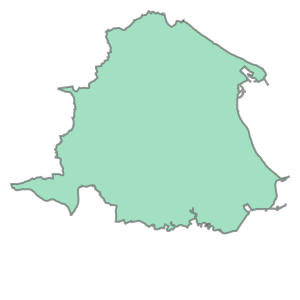

In [10]:
shp_file.geometry.iloc[0]
#britain_df.geometry.iloc[0]

In [20]:
# check coordinate reference systems (CRS)
shp_file.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [21]:
# There is a number of CRS systems available in GeoPandas. 
# This particular one, used in the table above is “epsg:27700” — if you 
# are planning to work with the UK data this is something you are going to use a lot, so you’ll get to remember it, be warned. 
# An alternative in the UK, using lat/long is “epsg:4326”.

la_4326 = shp_file.to_crs("epsg:4326")
la_4326.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,"MULTIPOLYGON (((-1.26844 54.72611, -1.26821 54..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,"MULTIPOLYGON (((-1.24389 54.58935, -1.24256 54..."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,"MULTIPOLYGON (((-1.13756 54.64580, -1.13779 54..."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,"MULTIPOLYGON (((-1.31727 54.64479, -1.31713 54..."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((-1.63767 54.61713, -1.63766 54.61669..."


In [24]:
# Saving to and reading from non geo-specific formats (csv). Geometry object conversion.

shp_file.to_csv('shp_file.csv', compression='gzip')

# you can not read a csv file directly from GeoPandas, so you have to load it back as a normal DataFrame
shp_file_new = pd.read_csv('shp_file.csv', compression='gzip')

shp_file_new.head()

,Unnamed: 0,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,0,1,E06000001,Hartlepool,NaN,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,MULTIPOLYGON (((447213.8995000003 537036.10429...
1,1,2,E06000002,Middlesbrough,NaN,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,MULTIPOLYGON (((448958.9007000001 521835.69529...
2,2,3,E06000003,Redcar and Cleveland,NaN,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,MULTIPOLYGON (((455752.6002000002 528195.70480...
3,3,4,E06000004,Stockton-on-Tees,NaN,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,MULTIPOLYGON (((444157.0018999996 527956.30330...
4,4,5,E06000005,Darlington,NaN,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((423496.602 524724.2984999996, 423497..."


In [30]:
# if we try to have a look at one of our geometry objects as we did before, 
# we get something very different for a map:

shp_file_new = shp_file_new[shp_file_new.columns[1:]]
# shp_file_new['geometry'].iloc[0]

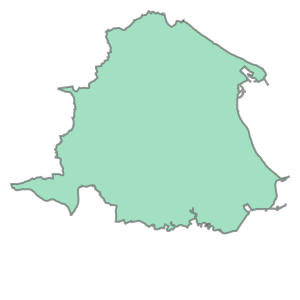

In [31]:
# All is not lost, however, as shapely provides us with a way of converting them back.
# Apart from loading shapely here, I will also need swifter library. 
# You can do without it by using straight apply method, but among other things — swifter 
# provides you with a nice progress bar and time estimate

import swifter
from shapely import wkt
shp_file_new['geometry1'] = shp_file_new['geometry'].swifter.apply(lambda x: wkt.loads(x))

shp_file_new['geometry1'].iloc[0]

In [32]:
shp_file_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lad17cd     380 non-null    object 
 1   lad17nm     380 non-null    object 
 2   lad17nmw    22 non-null     object 
 3   bng_e       380 non-null    int64  
 4   bng_n       380 non-null    int64  
 5   long        380 non-null    float64
 6   lat         380 non-null    float64
 7   st_areasha  380 non-null    float64
 8   st_lengths  380 non-null    float64
 9   geometry    380 non-null    object 
 10  geometry1   380 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 32.8+ KB


In [34]:
# The new column appears as an object type, not geometry type. 
# This won’t stop us from converting it to GeoDataFrame however.

shp_file_new_geo = shp_file_new.drop(columns=['geometry']).rename(columns={'geometry1': 'geometry'})
shp_file_new_geo = gpd.GeoDataFrame(shp_file_new_geo)
shp_file_new_geo.crs = 'epsg:27700'

In [36]:
# finally geometry objects
shp_file_new_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lad17cd     380 non-null    object  
 1   lad17nm     380 non-null    object  
 2   lad17nmw    22 non-null     object  
 3   bng_e       380 non-null    int64   
 4   bng_n       380 non-null    int64   
 5   long        380 non-null    float64 
 6   lat         380 non-null    float64 
 7   st_areasha  380 non-null    float64 
 8   st_lengths  380 non-null    float64 
 9   geometry    380 non-null    geometry
dtypes: float64(4), geometry(1), int64(2), object(3)
memory usage: 29.8+ KB


In [37]:
# Finally, some quick calculations on our new shiny GeoDataFrame:
# Verifying length and area:

shp_file_new_geo['area'] = shp_file_new_geo['geometry'].swifter.apply(lambda x: x.area)
shp_file_new_geo['length'] = shp_file_new_geo['geometry'].swifter.apply(lambda x: x.length)
shp_file_new_geo[['lad17cd', 'lad17nm', 'st_areasha', 'st_lengths', 'area', 'length']].head()

,lad17cd,lad17nm,st_areasha,st_lengths,area,length
0,E06000001,Hartlepool,9.355951e+07,71707.407523,9.355951e+07,71707.407523
1,E06000002,Middlesbrough,5.388858e+07,43840.866561,5.388858e+07,43840.866561
2,E06000003,Redcar and Cleveland,2.448203e+08,97993.391012,2.448203e+08,97993.391012
3,E06000004,Stockton-on-Tees,2.049622e+08,119581.595543,2.049622e+08,119581.595543
4,E06000005,Darlington,1.974757e+08,107206.401694,1.974757e+08,107206.401694


In [43]:
# Let’s also have a look at which region has the most complicated polygon/multiPolygon. 
# We are going to judge that by the number of points needed to describe it.
# Essentially, this means counting points in exterior and interior boundaries:

shp_file_new_geo['point_count'] = shp_file_new_geo['geometry'].swifter.apply(
    lambda x: np.sum([len(np.array(a.exterior)) + np.sum([len(np.array(b)) for b in a.interiors]) for a in x]) if x.type == 'MultiPolygon' 
    else len(np.array(x.exterior)) + np.sum([len(np.array(a)) for a in x.interiors])
)


# We then sort the values and voila, we have our top ten:

shp_file_new_geo[
    ['lad17cd', 'lad17nm', 'point_count']
].sort_values('point_count', ascending=False).head(10)

,lad17cd,lad17nm,point_count
334,S12000017,Highland,363533.0
331,S12000013,Na h-Eileanan Siar,339313.0
348,S12000035,Argyll and Bute,269625.0
342,S12000027,Shetland Islands,210121.0
50,E06000052,Cornwall,125186.0
339,S12000023,Orkney Islands,84016.0
327,S12000006,Dumfries and Galloway,75357.0
365,W06000009,Pembrokeshire,69455.0
83,E07000044,South Hams,40223.0
347,S12000034,Aberdeenshire,36257.0
